# Сегментация клиентской базы телекоммуникационной компании

**Аналитическая задача** — провести анализ данных с целью выделения наиболее типичных групп клиентов и разработки предложений для каждой из групп.

## Описание данных
Каждый клиент описывается следующим набором признаков:
- `Код`, `Возраст`, `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Звонки в другие страны`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`.

## Примерный план по выполнению проекта

**Шаг 1.** Загрузка данных;

**Шаг 2.** Первичная обработка данных (при необходимости):
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения;

**Шаг 3.** Провести исследовательский анализ данных:
- исследовать распределения признаков;
- исследовать возможные зависимости между признаками;

**Шаг 4.** Провести сегментацию клиентов методами кластерного анализа:
- провести кластеризацию данных;
- исследовать качество полученного разбиения;
- по возможности использовать другие методики сегментации клиентов (RFM-анализ);
- дать содержательную интерпретацию получившимся группам;
- выработать рекомендации по каждой из групп;

**Шаг 5.** Проверить гипотезы по группам
- сформулировать и проверить гипотезы о равенстве значений показателей по получившимся группам.  

# Подключение библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Загрузка данных

In [ ]:
df = pd.read_csv('mobile.txt', 
                 delimiter = '\t', 
                 encoding = 'cp1251')
df

,Код,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц
0,0,24,NaN,2.4,12.0,65.0,5,0,0,5,56
1,1,51,287.51,1.7,111.0,109.0,1,44,0,6,1
2,2,41,113.70,2.1,41.0,27.0,0,0,0,1,36
3,3,35,410.23,5.6,47.0,49.0,0,0,0,11,23
4,4,26,537.60,4.8,58.0,77.0,4,0,0,16,29
...,...,...,...,...,...,...,...,...,...,...,...
4487,4586,40,186.20,3.7,36.0,28.0,2,6,0,12,30
4488,4587,40,500.68,6.0,46.0,66.0,0,6,0,15,23
4489,4588,60,470.42,3.5,58.0,129.0,2,4,0,19,5
4490,4589,38,858.99,9.3,50.0,74.0,0,0,0,28,69


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Код                                    4492 non-null   int64  
 1   Возраст                                4492 non-null   int64  
 2   Среднемесячный расход                  4468 non-null   float64
 3   Средняя продолжительность разговоров   4475 non-null   float64
 4   Звонков днем за месяц                  4472 non-null   float64
 5   Звонков вечером за месяц               4489 non-null   float64
 6   Звонков ночью за месяц                 4492 non-null   object 
 7   Звонки в другие города                 4492 non-null   object 
 8   Звонки в другие страны                 4492 non-null   int64  
 9   Доля звонков на стационарные телефоны  4492 non-null   object 
 10  Количество SMS за месяц                4492 non-null   object 
dtypes: f

In [ ]:
perc = [0.01, 0.05, 0.25, 0.5, 0.75, 0.8, 0.95, 0.99]
df.describe(percentiles=perc)

,Код,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонки в другие страны
count,4492.000000,4492.000000,4468.000000,4475.000000,4472.000000,4489.000000,4492.000000
mean,2294.630677,41.894924,505.533577,4.230827,63.899374,70.363778,0.394034
std,1325.224451,13.077254,646.354693,3.005210,62.877394,41.219909,1.171980
min,0.000000,19.000000,3.180000,0.100000,1.000000,1.000000,0.000000
1%,44.910000,19.000000,7.790100,0.400000,2.000000,2.000000,0.000000
5%,228.550000,20.000000,16.800000,1.100000,5.000000,4.000000,0.000000
25%,1147.750000,31.000000,152.490000,2.100000,37.000000,42.000000,0.000000
50%,2297.500000,43.000000,315.510000,3.300000,53.000000,71.000000,0.000000
75%,3443.250000,52.000000,599.840000,5.900000,68.000000,98.000000,0.000000
80%,3668.800000,54.000000,701.704000,6.520000,74.000000,106.000000,0.000000


In [ ]:
df.isna().sum()

Код                                       0
Возраст                                   0
Среднемесячный расход                    24
Средняя продолжительность разговоров     17
Звонков днем за месяц                    20
Звонков вечером за месяц                  3
Звонков ночью за месяц                    0
Звонки в другие города                    0
Звонки в другие страны                    0
Доля звонков на стационарные телефоны     0
Количество SMS за месяц                   0
dtype: int64

In [ ]:
print(df.duplicated().sum())
print(df.drop(columns='Код').duplicated().sum())

0
0


**Вывод**: данные загружены корректно, по отдельным признакам имеются пропуски, для нескольких признаков требуется преобразование типов. Столбцы `Код` и `Звонки в другие страны` можно удалить из дальнейшего рассмотрения.

# Первичная обработка данных

## Удаление столбцов

In [ ]:
df.drop(columns = ['Код'], 
        inplace = True)

## Корректировка заголовков

In [ ]:
df.columns

Index(['Возраст', 'Среднемесячный расход',
       'Средняя продолжительность разговоров', 'Звонков днем за месяц',
       'Звонков вечером за месяц', 'Звонков ночью за месяц',
       'Звонки в другие города', 'Звонки в другие страны',
       'Доля звонков на стационарные телефоны', 'Количество SMS за месяц'],
      dtype='object')

In [ ]:
dict_rename_columns = {
'Возраст' : 'age', 
'Среднемесячный расход' : 'average_monthly_expense',
'Средняя продолжительность разговоров' : 'average_call_duration', 
'Звонков днем за месяц' : 'calls_day_month',
'Звонков вечером за месяц' : 'calls_evening_month', 
'Звонков ночью за месяц' : 'calls_night_month',
'Звонки в другие города' : 'calls_other_cities', 
'Доля звонков на стационарные телефоны' : 'percentage_calls_telephone', 
'Количество SMS за месяц' : 'number_sms_month',
'Звонки в другие страны': 'calls_other_countries'}

In [ ]:
df.rename(columns = dict_rename_columns, 
          inplace = True)
df.columns

Index(['age', 'average_monthly_expense', 'average_call_duration',
       'calls_day_month', 'calls_evening_month', 'calls_night_month',
       'calls_other_cities', 'calls_other_countries',
       'percentage_calls_telephone', 'number_sms_month'],
      dtype='object')

## Преобразование типов

In [ ]:
df['calls_night_month'] = df['calls_night_month'].replace("'7'",7).astype('int')
df['calls_other_cities'] = df['calls_other_cities'].replace({"'29'":29, "'0'":0}).astype('int')
df['percentage_calls_telephone'] = df['percentage_calls_telephone'].replace("'2'",2).astype('int')
df['number_sms_month'] = df['number_sms_month'].replace("'12'",12).astype('int')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         4492 non-null   int64  
 1   average_monthly_expense     4468 non-null   float64
 2   average_call_duration       4475 non-null   float64
 3   calls_day_month             4472 non-null   float64
 4   calls_evening_month         4489 non-null   float64
 5   calls_night_month           4492 non-null   int64  
 6   calls_other_cities          4492 non-null   int64  
 7   calls_other_countries       4492 non-null   int64  
 8   percentage_calls_telephone  4492 non-null   int64  
 9   number_sms_month            4492 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 351.1 KB


## Работа с пропущенными значениями

In [ ]:
old_row_count = df.shape[0]
df.dropna(inplace = True)
new_row_count = df.shape[0]
print('Удалено {:.2%} данных'.format((old_row_count - new_row_count)/old_row_count))

Удалено 1.38% данных


**Вывод**

# Разведочный анализ данных 

In [ ]:
def calc_wisk(col):
    Q1, median, Q3 = np.percentile(np.asarray(df[col]), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df[col]) <= hival, np.asarray(df[col]))
    wisklo = np.compress(np.asarray(df[col]) >= loval, np.asarray(df[col]))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    return actual_loval, actual_hival

## Исследование признака `age`

## Исследование признака `average_monthly_expense`  

## Исследование признака `average_call_duration`

## Исследование признака `calls_day_month`

## Исследование признака `calls_evening_month`

## Исследование признака `calls_night_month`

## Исследование признака `calls_other_cities`

## Исследование признака `calls_other_countries`

## Исследование признака `percentage_calls_telephone`

## Исследование признака `number_sms_month`

## Исследование все признаков

In [ ]:
dict_rename_columns.keys()

dict_keys(['Возраст', 'Среднемесячный расход', 'Средняя продолжительность разговоров', 'Звонков днем за месяц', 'Звонков вечером за месяц', 'Звонков ночью за месяц', 'Звонки в другие города', 'Доля звонков на стационарные телефоны', 'Количество SMS за месяц', 'Звонки в другие страны'])

In [ ]:
dict_label = dict(zip(dict_rename_columns.values(), dict_rename_columns.keys()))

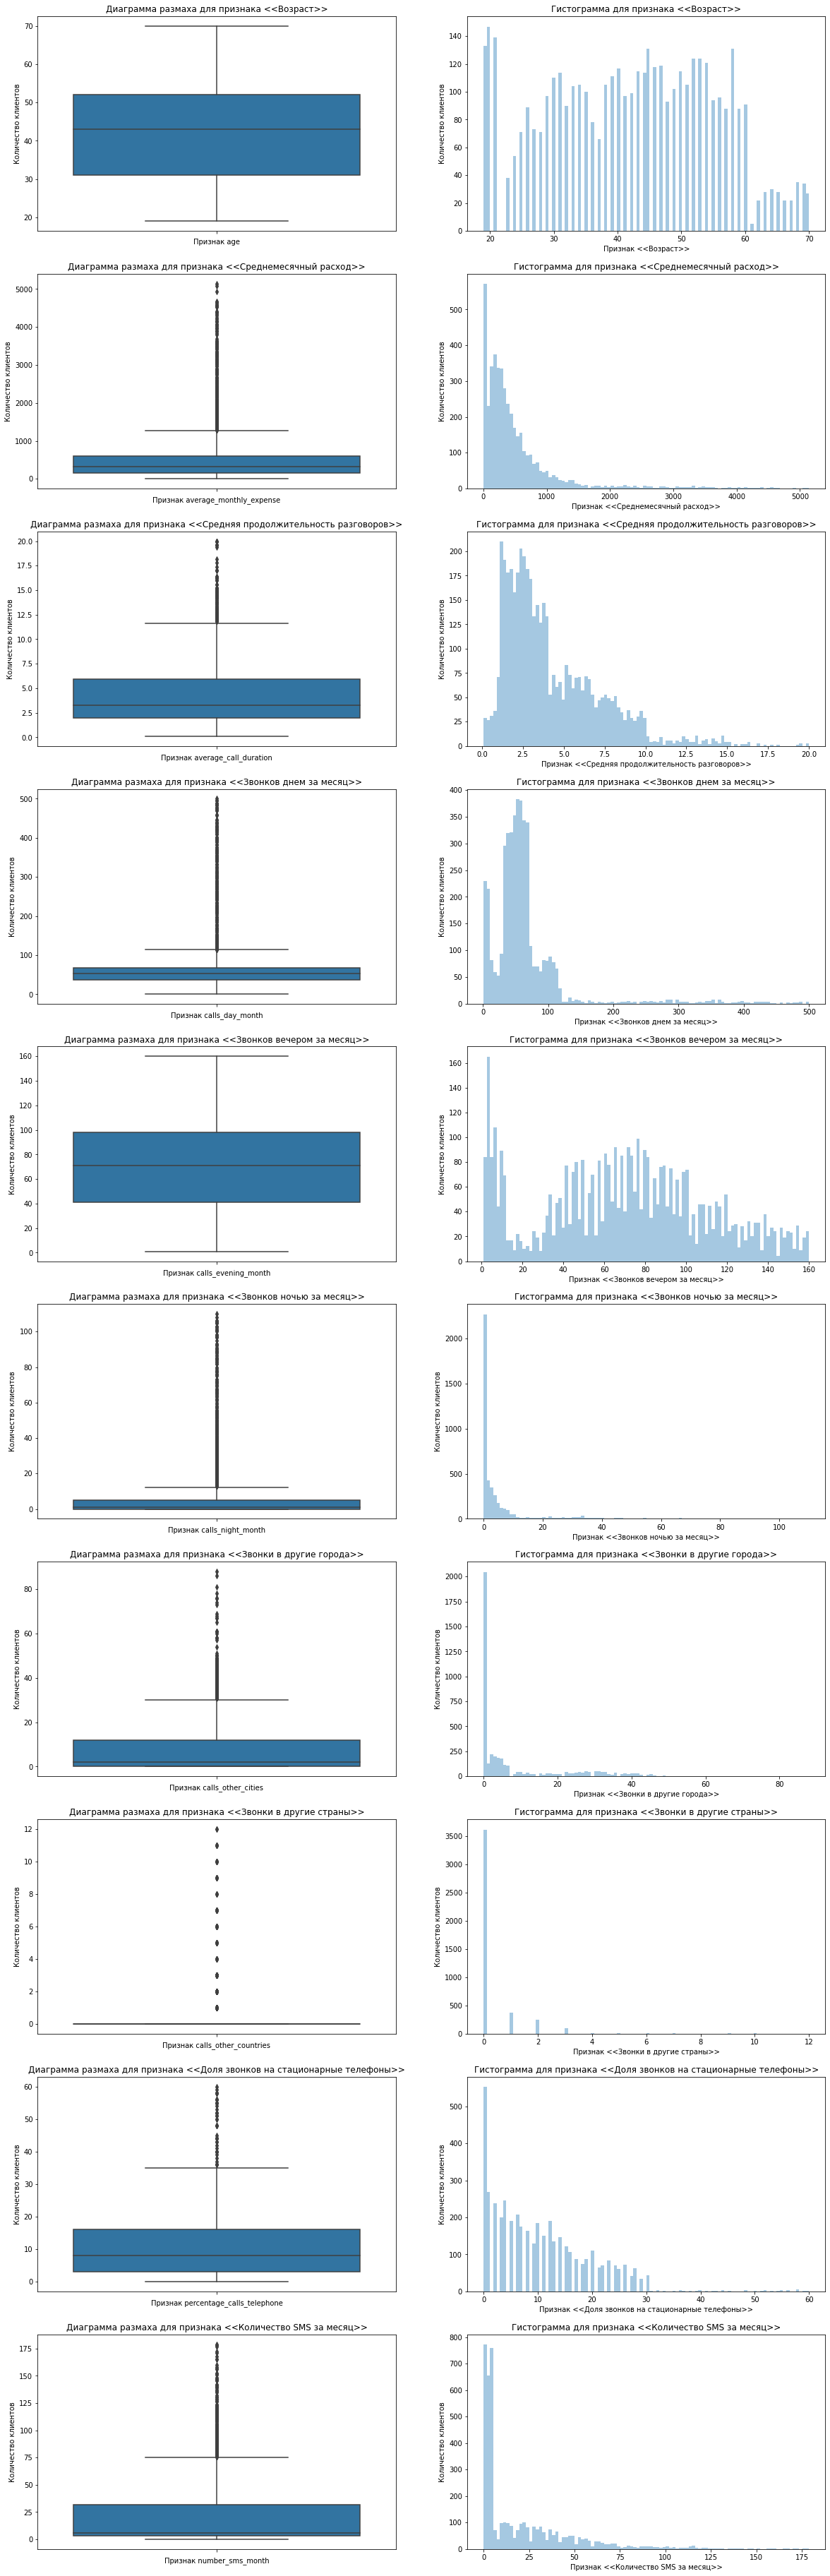

In [ ]:
fig, axes = plt.subplots(10,2, sharey=True, figsize=(20,66))
i=0
j = 1
for i, col in enumerate(df.columns):
    plt.subplot(10,2,j)
    ax = sns.boxplot(y = df[col])
    ax.set_ylabel('Количество клиентов')
    ax.set_xlabel('Признак {}'.format(col))
    ax.set_title('Диаграмма размаха для признака <<{}>>'.format(dict_label[col]))
    plt.subplot(10,2,j+1)
    ax = sns.distplot(x = df[col], kde = False, bins = 100)
    ax.set_ylabel('Количество клиентов')
    ax.set_xlabel('Признак <<{}>>'.format(dict_label[col]))
    ax.set_title('Гистограмма для признака <<{}>>'.format(dict_label[col])) 
    j+=2     

### Расчет границ признаков по диаграмме размаха

In [ ]:
lst_tuple_wisk = list()
lst_min = list()
lst_max = list()
for col in df.columns:
Q1, median, Q3 = np.percentile(np.asarray(df['last_price']), [25, 50, 75])
IQR = Q3 - Q1
loval = Q1 - 1.5 * IQR
hival = Q3 + 1.5 * IQR
wiskhi = np.compress(np.asarray(df[col]) <= hival, np.asarray(df['last_price']))
wisklo = np.compress(np.asarray(df[col]) >= loval, np.asarray(df['last_price']))
actual_hival = np.max(wiskhi)
actual_loval = np.min(wisklo)
actual_loval, actual_hival

IndentationError: ignored

In [ ]:
dict_to_df = {'wisk': lst_tuple_wisk,
              'count_small_an' : lst_min,
              'count_big_an' : lst_max
              }
df_temp = pd.DataFrame(data = dict_to_df, 
                     index = dict_label.values())
df_temp

,wisk,count_small_an,count_big_an
Возраст,"(19, 70)",0,0
Среднемесячный расход,"(3.18, 1270.16)",0,324
Средняя продолжительность разговоров,"(0.1, 11.6)",0,124
Звонков днем за месяц,"(1.0, 114.0)",0,270
Звонков вечером за месяц,"(1.0, 160.0)",0,0
Звонков ночью за месяц,"(0, 12)",0,513
Звонки в другие города,"(0, 30)",0,488
Доля звонков на стационарные телефоны,"(0, 0)",0,810
Количество SMS за месяц,"(0, 35)",0,49
Звонки в другие страны,"(0, 75)",0,234


### Расчет описательных статистик

In [ ]:
p_table =  df.agg(['mean', 'median', 'min', 'max']).T
p_table.index = dict_label.values()

### Итоговый отчет

In [ ]:
p_table.merge(df_temp, 
              left_index = True, 
              right_index = True)

,mean,median,min,max,wisk,count_small_an,count_big_an
Возраст,41.883070,43.000,19.00,70.00,"(19, 70)",0,0
Среднемесячный расход,506.384546,315.155,3.18,5142.76,"(3.18, 1270.16)",0,324
Средняя продолжительность разговоров,4.226309,3.300,0.10,20.00,"(0.1, 11.6)",0,124
Звонков днем за месяц,63.907223,53.000,1.00,500.00,"(1.0, 114.0)",0,270
Звонков вечером за месяц,70.293905,71.000,1.00,160.00,"(1.0, 160.0)",0,0
Звонков ночью за месяц,6.261400,1.000,0.00,110.00,"(0, 12)",0,513
Звонки в другие города,8.682167,2.000,0.00,88.00,"(0, 30)",0,488
Доля звонков на стационарные телефоны,0.395485,0.000,0.00,12.00,"(0, 0)",0,810
Количество SMS за месяц,10.330474,8.000,0.00,60.00,"(0, 35)",0,49
Звонки в другие страны,21.160497,6.000,0.00,179.00,"(0, 75)",0,234


### Диаграммы парных сравнений

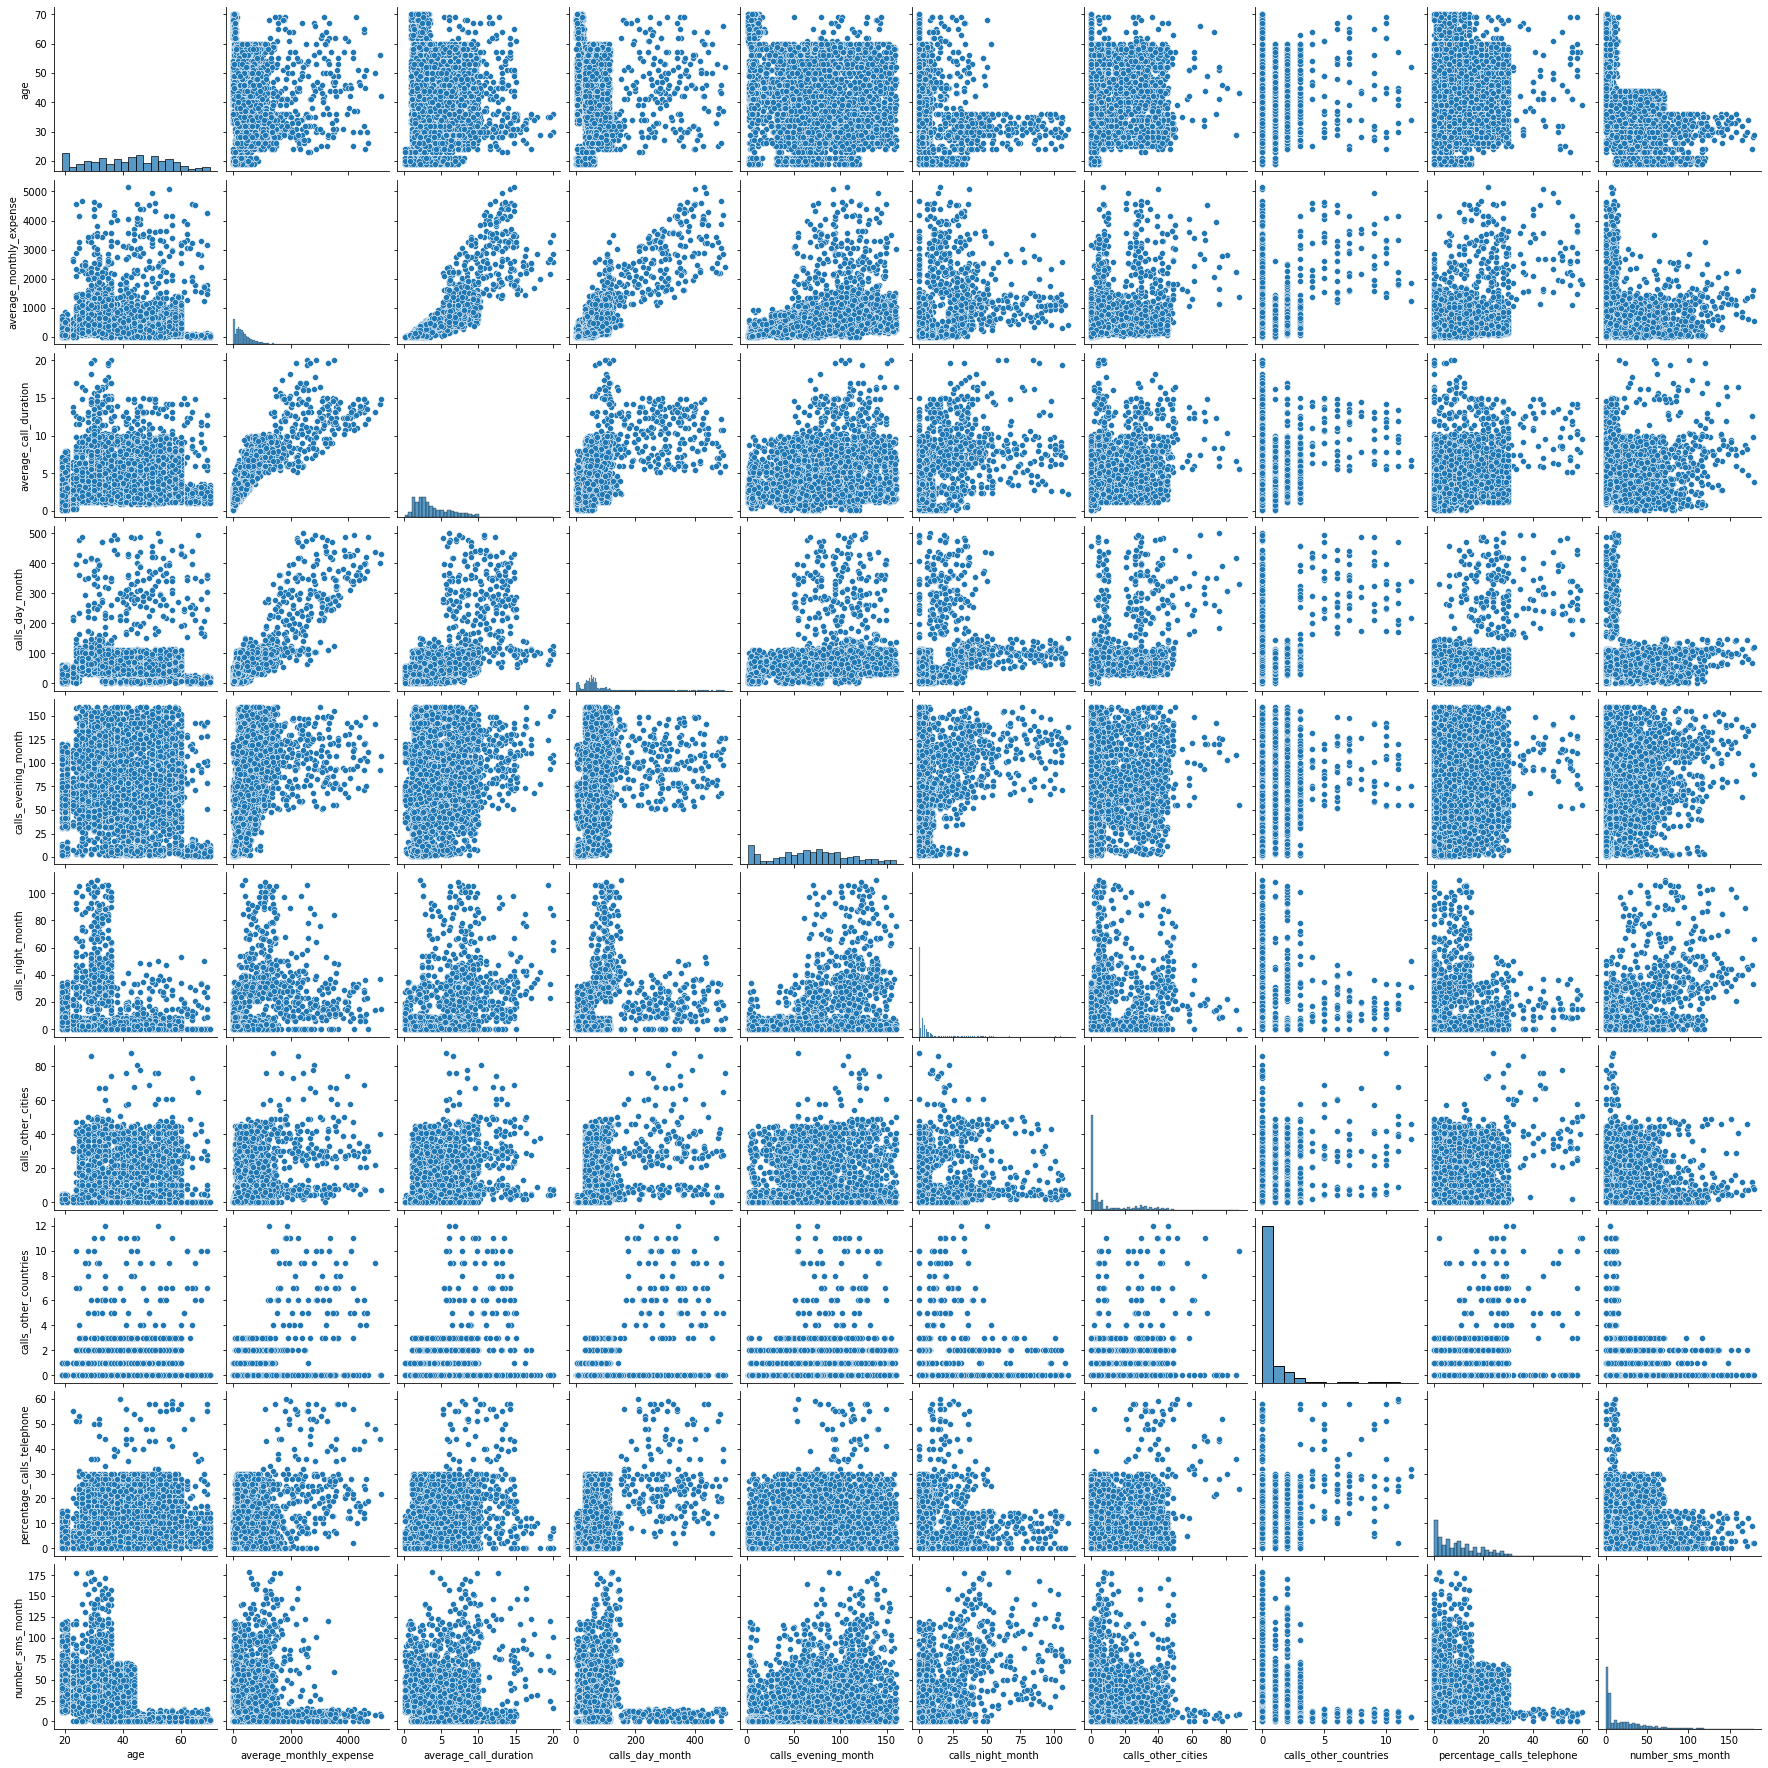

In [ ]:
sns.pairplot(data = df)

In [ ]:
dict_rename_columns = {
'Возраст' : 'age', 
'Среднемесячный расход' : 'average_monthly_expense',
'Средняя продолжительность разговоров' : 'average_call_duration', 
'Звонков днем за месяц' : 'calls_day_month',
'Звонков вечером за месяц' : 'calls_evening_month', 
'Звонков ночью за месяц' : 'calls_night_month',
'Звонки в другие города' : 'calls_other_cities', 
'Доля звонков на стационарные телефоны' : 'percentage_calls_telephone', 
'Количество SMS за месяц' : 'number_sms_month',
'Звонки в другие страны': 'calls_other_countries'}

### Матрица корреляций

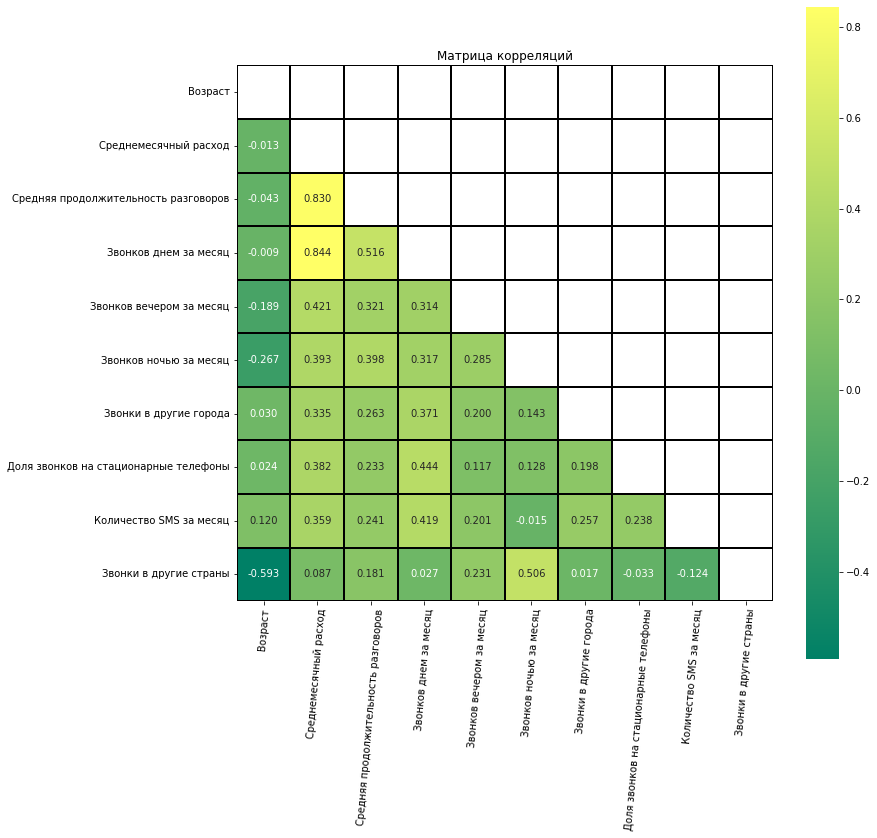

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(data = df.corr(), annot=True, square=True, 
            cmap='summer', fmt='.3f', linewidths=1, linecolor='black', mask=np.triu(df.corr()))
ax.set_xticklabels(dict_label.values(), rotation = 85)
ax.set_yticklabels(dict_label.values())
plt.title('Матрица корреляций')
plt.show()

### Дискретизация признака `age`

In [ ]:
#cut. qcut

In [ ]:
df.age.value_counts().sort_index()

19    133
20    147
21    139
23     38
24     54
25     71
26     89
27     73
28     71
29     97
30    110
31    114
32     90
33    104
34    105
35    100
36     78
37     66
38    105
39    111
40    117
41     97
42     99
43    115
44    114
45    131
46    118
47    119
48     93
49    102
50    115
51    105
52    124
53    124
54    121
55     94
56     96
57     88
58    131
59     88
60     91
61      5
62     22
63     28
64     30
65     28
66     22
67     22
68     35
69     34
70     27
Name: age, dtype: int64

In [ ]:
cut_labels_4 = ['студенты', 'аспиранты', 'кандидаты', 'доктора']
cut_bins = [18, 21, 29, 60, 70]

In [ ]:
age_disc = pd.cut(df['age'], 
       bins=cut_bins, 
       #labels=cut_labels_4,
       right = True).value_counts()
#age_disc.name = 'age_disc'
age_disc

(29, 60]    3265
(21, 29]     493
(18, 21]     419
(60, 70]     253
Name: age, dtype: int64

In [ ]:
df = df.merge(age_disc, 
         left_index = True,
         right_index = True)

In [ ]:
df.columns

Index(['age', 'average_monthly_expense', 'average_call_duration',
       'calls_day_month', 'calls_evening_month', 'calls_night_month',
       'calls_other_cities', 'calls_other_countries',
       'percentage_calls_telephone', 'number_sms_month', 'age_disc'],
      dtype='object')

In [ ]:
df

,age,average_monthly_expense,average_call_duration,calls_day_month,calls_evening_month,calls_night_month,calls_other_cities,calls_other_countries,percentage_calls_telephone,number_sms_month,age_disc
1,51,287.51,1.7,111.0,109.0,1,44,0,6,1,кандидаты
2,41,113.70,2.1,41.0,27.0,0,0,0,1,36,кандидаты
3,35,410.23,5.6,47.0,49.0,0,0,0,11,23,кандидаты
4,26,537.60,4.8,58.0,77.0,4,0,0,16,29,аспиранты
5,26,324.56,3.3,45.0,75.0,3,1,1,8,15,аспиранты
...,...,...,...,...,...,...,...,...,...,...,...
4487,40,186.20,3.7,36.0,28.0,2,6,0,12,30,кандидаты
4488,40,500.68,6.0,46.0,66.0,0,6,0,15,23,кандидаты
4489,60,470.42,3.5,58.0,129.0,2,4,0,19,5,кандидаты
4490,38,858.99,9.3,50.0,74.0,0,0,0,28,69,кандидаты


In [ ]:
df[['age', 'age_disc']]

,age,age_disc
1,51,кандидаты
2,41,кандидаты
3,35,кандидаты
4,26,аспиранты
5,26,аспиранты
...,...,...
4487,40,кандидаты
4488,40,кандидаты
4489,60,кандидаты
4490,38,кандидаты


In [ ]:
df.groupby('age_disc')[['average_call_duration', 'calls_day_month']].agg(['max', 'min'])

average_call_duration      calls_day_month     
                            max  min             max  min
age_disc                                                 
студенты                    8.0  0.1            60.0  1.0
аспиранты                  19.6  0.2           489.0  2.0
кандидаты                  20.0  0.9           500.0  1.0
доктора                    15.0  1.0           496.0  1.0

In [ ]:
df.groupby('age_disc')[['calls_other_cities', 'percentage_calls_telephone']].agg(['sum'])

,calls_other_cities,percentage_calls_telephone
,sum,sum
age_disc,,
студенты,230,1536
аспиранты,4614,5238
кандидаты,32829,36881
доктора,789,2109
